In [65]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
import scipy.signal


(89400, 5)
(89400, 16, 16, 3)
(595, 5)
(595, 16, 16, 3)
sprites with mirroed:  [[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255

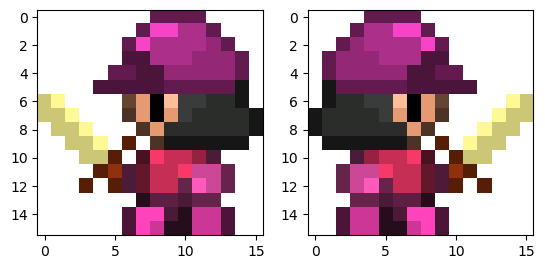

In [145]:
data = np.load('./Dataset1/sprites_labels.npy')
sprites = np.load('./Dataset1/sprites.npy')

print(data.shape)
print(sprites.shape)

selected_data = data[:894]
selected_data = np.delete(selected_data, slice(244, 543), axis=0)
print(selected_data.shape)

selected_sprites = sprites[:894]
selected_sprites = np.delete(selected_sprites, slice(244, 543), axis=0)
print(selected_sprites.shape)

data_with_mirrored = np.concatenate((selected_data, selected_data), axis=0)

mirrored_sprites = np.flip(selected_sprites, axis=2)
sprites_with_mirrored = np.concatenate((selected_sprites, mirrored_sprites), axis=0)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(selected_sprites[1])
ax[1].imshow(mirrored_sprites[1]);

print("sprites with mirroed: ", sprites_with_mirrored)


(446, 16, 16, 3) (149, 16, 16, 3) (892, 16, 16, 3) (298, 16, 16, 3)
(18, 18)


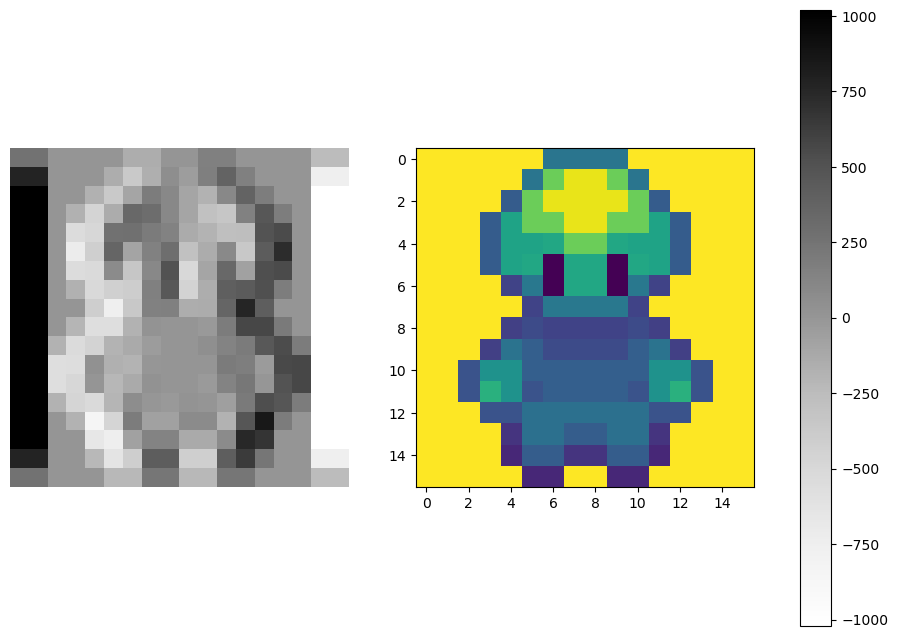

In [150]:
X_train, X_test, y_train, y_test = train_test_split(sprites_with_mirrored, data_with_mirrored)

y_train_one_hot = tf.keras.utils.to_categorical(y_train, 5)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 5)

print(X.shape, y.shape, X_train.shape, X_test.shape)


fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


conv_result = scipy.signal.convolve2d(X_train[400, :, :, :1].reshape(16, 16), np.array([[1,2,1],[0,0,0],[-1,-2,-1]]).T)
im = ax.imshow(conv_result, cmap='Greys')
ax2.imshow(X_train[400, :, :, :1])
ax.axis('off')
fig.colorbar(im, ax=[ax, ax2]);

print(conv_result.shape)


In [153]:
conv_network = tf.keras.Sequential()

conv_network.add(tf.keras.layers.Conv2D(49, (3, 3), strides=(2,2), activation='relu', input_shape=(16,16,1)))
conv_network.add(tf.keras.layers.Conv2D(49, (3, 3), strides=(2,2), activation='relu', input_shape=(16,16,1)))
conv_network.add(tf.keras.layers.Conv2D(49, (3, 3), strides=(2,2), activation='relu', input_shape=(16,16,1)))
conv_network.add(tf.keras.layers.Flatten())

conv_network.add(tf.keras.layers.Dense(100, activation='relu'))
conv_network.add(tf.keras.layers.Dense(10, activation='softmax'))





Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "conv2d_54" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 16, 16, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 16, 16, 3), dtype=uint8)
  • training=True
  • mask=None